# AirBnB Fair Valuation

Welcome to Airbnb Analysis Corp.! Your task is to set the competitive **daily accomodation rate** for a client's house in Bondi Beach. The owner currently charges $500. We have been tasked to estimate a **fair value** that the owner should be charging. The house has the following characteristics and constraints. While developing this model you came to realise that Airbnb can use your model to estimate the fair value of any property on their database, your are effectively creating a recommendation model for all prospective hosts!


1. The owner has been a host since **August 2010**
1. The location is **lon:151.274506, lat:33.889087**
1. The current review score rating **95.0**
1. Number of reviews **53**
1. Minimum nights **4**
1. The house can accomodate **10** people.
1. The owner currently charges a cleaning fee of **370**
1. The house has **3 bathrooms, 5 bedrooms, 7 beds**.
1. The house is available for **255 of the next 365 days**
1. The client is **verified**, and they are a **superhost**.
1. The cancelation policy is **strict with a 14 days grace period**.
1. The host requires a security deposit of **$1,500**


*All values strictly apply to the month of July 2018*

In [1]:
# Defining our Sample Client Data
from dateutil import parser
dict_client = {}

dict_client["city"] = "Bondi Beach"
dict_client["longitude"] = 151.274506
dict_client["latitude"] = -33.889087
dict_client["review_scores_rating"] = 95
dict_client["number_of_reviews"] = 53
dict_client["minimum_nights"] = 4
dict_client["accommodates"] = 10
dict_client["bathrooms"] = 3
dict_client["bedrooms"] = 5
dict_client["beds"] = 7
dict_client["security_deposit"] = 1500
dict_client["cleaning_fee"] = 370
dict_client["property_type"] = "House"
dict_client["room_type"] = "Entire home/apt"
dict_client["availability_365"] = 255
dict_client["host_identity_verified"] = 't'  ## 1 for yes, 0 for no
dict_client["host_is_superhost"] = 't'
dict_client["cancellation_policy"] = "strict_14_with_grace_period"
dict_client["host_since"] = parser.parse("01-08-2010")

In [2]:
# import libraries
import pandas as pd
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
# get the data
github_p = "https://raw.githubusercontent.com/Finance-781/FinML/master/Lecture%202%20-%20End-to-End%20ML%20Project%20/Practice/"

my_file = Path("datasets/sydney_airbnb.csv") # Defines path
if my_file.is_file():              # See if file exists
    print("Local file found")      
    df = pd.read_csv('datasets/sydney_airbnb.csv')
else:
    print("Be patient: loading from github (2 minutes)")
    df = pd.read_csv(github_p+'datasets/sydney_airbnb.csv')
    print("Done")

Be patient: loading from github (2 minutes)
Done


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (36,54,55) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Take a look at data

In [4]:
df.head()

,id,listing_url,name,summary,space,description,neighborhood_overview,notes,transit,access,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,11156,https://www.airbnb.com/rooms/11156,An Oasis in the City,Very central to the city which can be reached ...,Potts Pt. is a vibrant and popular inner-city...,Very central to the city which can be reached ...,"It is very close to everything and everywhere,...","$150.00 key security deposit, refundable on re...",It is 7 minutes walk to the Kings Cross.train ...,Kitchen & laundry facilities. Shared bathroom.,...,10.0,10.0,10.0,9.0,f,moderate,f,f,1,1.69
1,12351,https://www.airbnb.com/rooms/12351,Sydney City & Harbour at the door,Come stay with Vinh & Stuart (Awarded as one o...,"We're pretty relaxed hosts, and we fully appre...",Come stay with Vinh & Stuart (Awarded as one o...,"Pyrmont is an inner-city village of Sydney, on...",We've a few reasons for the 6.00pm arrival tim...,Our home is centrally located and an easy walk...,We look forward to welcoming you just as we wo...,...,10.0,10.0,10.0,10.0,f,strict_14_with_grace_period,t,t,2,4.83
2,14250,https://www.airbnb.com/rooms/14250,Manly Harbour House,"Beautifully renovated, spacious and quiet, our...",Our home is a thirty minute walk along the sea...,"Beautifully renovated, spacious and quiet, our...",Balgowlah Heights is one of the most prestigio...,NaN,Balgowlah - Manly bus # 131 or #132 (Bus stop...,Guests have access to whole house except locke...,...,10.0,8.0,10.0,10.0,f,strict_14_with_grace_period,f,f,2,0.03
3,14935,https://www.airbnb.com/rooms/14935,Eco-conscious Travellers: Private Room,Welcome! This apartment will suit a short term...,I live upstairs in my own room with my own bat...,Welcome! This apartment will suit a short term...,NaN,"The building can be hard to find, so please en...",DIRECTIONS VIA TAXI: Get dropped off at Renwic...,"I work from home most times - so if I'm home, ...",...,9.0,10.0,9.0,9.0,f,moderate,f,f,2,2.14
4,14974,https://www.airbnb.com/rooms/14974,Eco-conscious Traveller: Sofa Couch,Welcome! This apartment will suit a short term...,Comes with a fully equipped gym and pool - whi...,Welcome! This apartment will suit a short term...,NaN,I live upstairs in my own room with my own bat...,DIRECTIONS VIA TAXI: Get dropped off at Renwic...,"I work from home most times - so if I'm home, ...",...,9.0,9.0,9.0,9.0,f,moderate,f,f,2,1.78


In [5]:
df.columns

Index(['id', 'listing_url', 'name', 'summary', 'space', 'description',
       'neighborhood_overview', 'notes', 'transit', 'access', 'interaction',
       'house_rules', 'picture_url', 'host_id', 'host_url', 'host_name',
       'host_since', 'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'square_feet',
       'price', 'weekly_price', 'monthly_price', 'security_deposit',
       'c

In [6]:
# select needed featurse for this case study
sel_col = ["price","city","longitude","latitude","review_scores_rating","number_of_reviews","minimum_nights","security_deposit","cleaning_fee",
        "accommodates","bathrooms","bedrooms","beds","property_type","room_type","availability_365" ,"host_identity_verified", 
        "host_is_superhost","host_since","cancellation_policy"]

df = df[sel_col]       

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27070 entries, 0 to 27069
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   price                   27070 non-null  object 
 1   city                    27037 non-null  object 
 2   longitude               27070 non-null  float64
 3   latitude                27070 non-null  float64
 4   review_scores_rating    19512 non-null  float64
 5   number_of_reviews       27070 non-null  int64  
 6   minimum_nights          27070 non-null  int64  
 7   security_deposit        16722 non-null  object 
 8   cleaning_fee            19250 non-null  object 
 9   accommodates            27070 non-null  int64  
 10  bathrooms               27048 non-null  float64
 11  bedrooms                27062 non-null  float64
 12  beds                    27037 non-null  float64
 13  property_type           27070 non-null  object 
 14  room_type               27070 non-null

In [8]:
df['host_since'].head()

0    23/09/09
1    14/05/09
2    20/11/09
3    30/11/09
4    30/11/09
Name: host_since, dtype: object

In [9]:
# need to use re to clean price , security_deposit, cleaning_fee columns
import re
ls_price = ["price" , "security_deposit","cleaning_fee"]
for col in ls_price:
  df[col] = df[col].fillna("0")
  df[col] = df[col].apply(lambda x : float(re.sub(r'[^0-9.]', '', x)))

# cnvert host_since to date format
df['host_since'] = pd.to_datetime(df['host_since'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [10]:
df.shape

(27070, 20)

In [11]:
df[ls_price].describe()

,price,security_deposit,cleaning_fee
count,27070.000000,27070.000000,27070.000000
mean,209.278796,305.766679,66.674178
std,304.336271,591.491850,88.246098
min,0.000000,0.000000,0.000000
25%,80.000000,0.000000,0.000000
50%,135.000000,0.000000,40.000000
75%,229.000000,450.000000,100.000000
max,12999.000000,7000.000000,999.000000


skew:  13.808558337216192
kurtosis:  413.4301463784445
quantile:  1250.0
mean:  209.27879571481344
median:  135.0




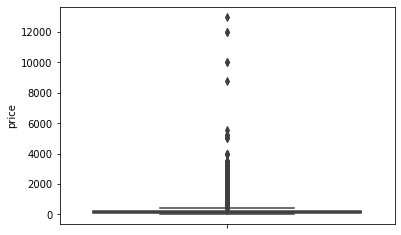

In [12]:
# use boxplot to check outliers for price

sns.boxplot( y = df["price"])
print("skew: ",df['price'].skew())
print("kurtosis: ",df['price'].kurtosis())
print("quantile: ",df['price'].quantile(0.99))
print("mean: ",df['price'].mean())
print("median: ",df['price'].median())

print('\n')

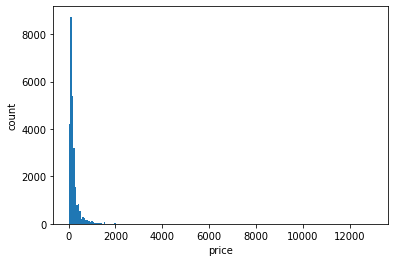

In [13]:
plt.hist( df['price'] , bins =200)
plt.xlabel('price')
plt.ylabel('count')
plt.show()

In [14]:
# remove all prices over 99% to delete outliers

df = df[df['price'] < df['price'].quantile(0.99)].reset_index(drop = True)

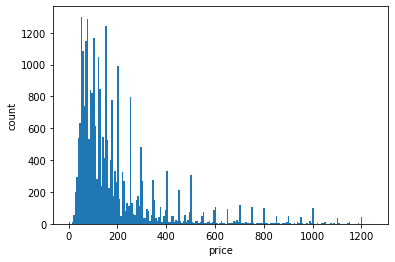



skew:  2.525424403426403
kurtosis:  7.626136820936184
quantile:  950.7999999999993
mean:  189.47530334142243
median:  130.0


In [15]:
plt.hist( df['price'] , bins =200)
plt.xlabel('price')
plt.ylabel('count')
plt.show()
print('\n')
print("skew: ",df['price'].skew())
print("kurtosis: ",df['price'].kurtosis())
print("quantile: ",df['price'].quantile(0.99))
print("mean: ",df['price'].mean())
print("median: ",df['price'].median())

In [16]:
# check for missing values
df.isnull().sum()

price                        0
city                        32
longitude                    0
latitude                     0
review_scores_rating      7386
number_of_reviews            0
minimum_nights               0
security_deposit             0
cleaning_fee                 0
accommodates                 0
bathrooms                   22
bedrooms                     8
beds                        33
property_type                0
room_type                    0
availability_365             0
host_identity_verified      34
host_is_superhost           34
host_since                  34
cancellation_policy          0
dtype: int64

In [17]:
print(df['cancellation_policy'].value_counts())

strict_14_with_grace_period    11474
flexible                        8513
moderate                        6767
super_strict_60                   30
super_strict_30                    1
Name: cancellation_policy, dtype: int64


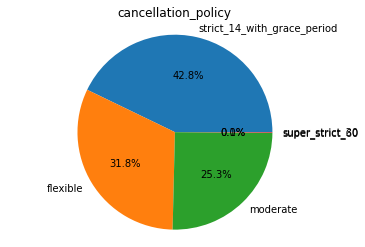

In [18]:
my_labels ='strict_14_with_grace_period', 'flexible' , 'moderate','super_strict_60', 'super_strict_30'
plt.pie(df['cancellation_policy'].value_counts(), labels = my_labels ,autopct='%1.1f%%')
plt.title('cancellation_policy')
plt.axis('equal')
plt.show()

In [52]:
# print(df["city"].value_counts().head(30))
df["city"].value_counts().head(10)

Bondi Beach     1666
Manly            949
Surry Hills      919
Bondi            784
Randwick         683
Sydney           680
Coogee           673
Darlinghurst     658
North Bondi      625
Newtown          490
Name: city, dtype: int64

In [53]:
list_of_20 = list(df["city"].value_counts().head(20).index)
df = df[df["city"].isin(list_of_20)].reset_index(drop=True)

In [54]:
print(df["property_type"].value_counts())

Apartment                 8296
House                     2483
Townhouse                  475
Condominium                177
Loft                        92
Guest suite                 71
Other                       53
Guesthouse                  47
Bed and breakfast           39
Hostel                      38
Serviced apartment          28
Villa                       25
Bungalow                    16
Cottage                     11
Tent                         6
Boutique hotel               6
Tiny house                   5
Resort                       5
Hotel                        4
Cabin                        2
Camper/RV                    2
Castle                       1
Yurt                         1
Chalet                       1
Aparthotel                   1
Casa particular (Cuba)       1
Earth house                  1
Houseboat                    1
Name: property_type, dtype: int64


In [60]:
# We now remove the rare occurences in categories as it's necessary for the cross validation step
# the below step is somewhat similar for what has been done with cities above

# We store the counts of each type in the variable item_counts
item_counts = df.groupby(['property_type']).size()

# Store a list of the rare property types here i.e. the types that have a count less than 10 
rare_items = list(item_counts.loc[item_counts <= 10].index.values)

# drop the property types that were rare
df = df[~df["property_type"].isin(rare_items)].reset_index(drop=True)

# Sanity check
df["property_type"].value_counts()

Apartment             8296
House                 2483
Townhouse              475
Condominium            177
Loft                    92
Guest suite             71
Other                   53
Guesthouse              47
Bed and breakfast       39
Hostel                  38
Serviced apartment      28
Villa                   25
Bungalow                16
Cottage                 11
Name: property_type, dtype: int64

In [62]:
df.head()

,price,city,longitude,latitude,review_scores_rating,number_of_reviews,minimum_nights,security_deposit,cleaning_fee,accommodates,bathrooms,bedrooms,beds,property_type,room_type,availability_365,host_identity_verified,host_is_superhost,host_since,cancellation_policy
0,65.0,Potts Point,151.226562,-33.869168,92.0,177,2,0.0,0.0,1,NaN,1.0,1.0,Apartment,Private room,339,f,t,2009-09-23,moderate
1,98.0,Pyrmont,151.191896,-33.865153,95.0,468,2,0.0,55.0,2,1.0,1.0,1.0,Townhouse,Private room,188,t,f,2009-05-14,strict_14_with_grace_period
2,63.0,Redfern,151.200450,-33.890765,89.0,172,2,0.0,0.0,2,1.0,1.0,1.0,Apartment,Private room,215,t,f,2009-11-30,moderate
3,39.0,Redfern,151.200896,-33.889667,90.0,147,2,0.0,0.0,1,2.0,1.0,1.0,Apartment,Shared room,287,t,f,2009-11-30,moderate
4,111.0,Darlinghurst,151.216541,-33.880455,88.0,272,2,0.0,0.0,2,1.0,1.0,1.0,Apartment,Private room,285,t,f,2009-03-12,strict_14_with_grace_period


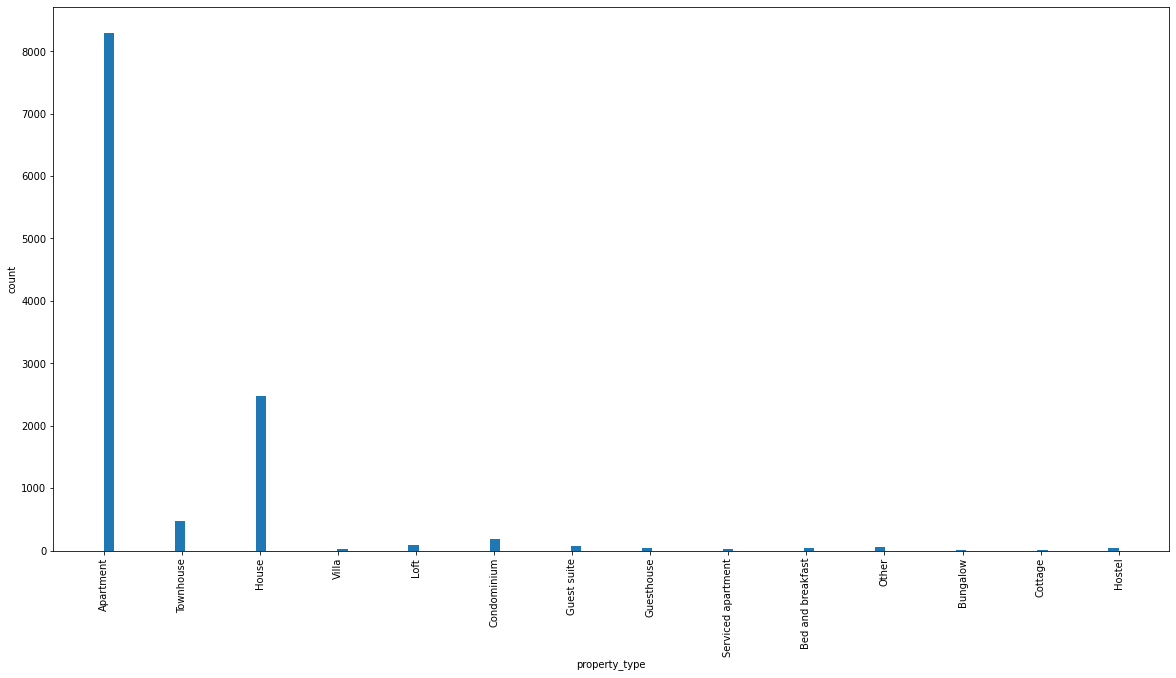

In [63]:
plt.figure(figsize=(20,10))
plt.hist(df['property_type'].astype(str), bins = 100)
plt.xticks(rotation=90)
plt.xlabel('property_type')
plt.ylabel('count')
plt.show()

In [64]:
print(df["room_type"].value_counts())

Entire home/apt    7633
Private room       4034
Shared room         184
Name: room_type, dtype: int64


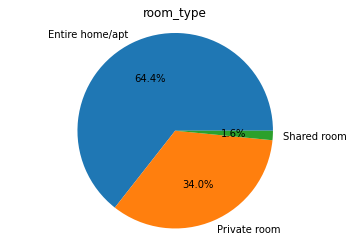

In [65]:
my_labels ='Entire home/apt' , "Private room" ,"Shared room"
plt.pie(df['room_type'].value_counts(), labels = my_labels ,autopct='%1.1f%%')
plt.title('room_type')
plt.axis('equal')
plt.show()

In [66]:
df.describe()

,price,longitude,latitude,review_scores_rating,number_of_reviews,minimum_nights,security_deposit,cleaning_fee,accommodates,bathrooms,bedrooms,beds,availability_365
count,11851.000000,11851.000000,11851.000000,8587.000000,11851.000000,11851.000000,11851.000000,11851.000000,11851.000000,11841.000000,11848.00000,11840.000000,11851.000000
mean,190.613703,151.241322,-33.883239,93.269244,14.938233,4.726437,275.630580,65.708717,3.131213,1.257833,1.46894,1.800591,85.929626
std,165.616169,0.031908,0.032986,9.288787,32.622700,13.984353,485.972672,79.505908,1.866447,0.535902,0.91426,1.269171,119.601583
min,0.000000,151.057299,-34.064623,20.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000
25%,88.000000,151.213792,-33.896272,90.000000,1.000000,2.000000,0.000000,0.000000,2.000000,1.000000,1.00000,1.000000,0.000000
50%,144.000000,151.246712,-33.888831,96.000000,3.000000,3.000000,0.000000,50.000000,2.000000,1.000000,1.00000,1.000000,7.000000
75%,229.000000,151.270185,-33.877360,100.000000,12.000000,5.000000,400.000000,99.500000,4.000000,1.000000,2.00000,2.000000,156.000000
max,1239.000000,151.317971,-33.600051,100.000000,468.000000,700.000000,6658.000000,670.000000,16.000000,8.000000,7.00000,12.000000,365.000000


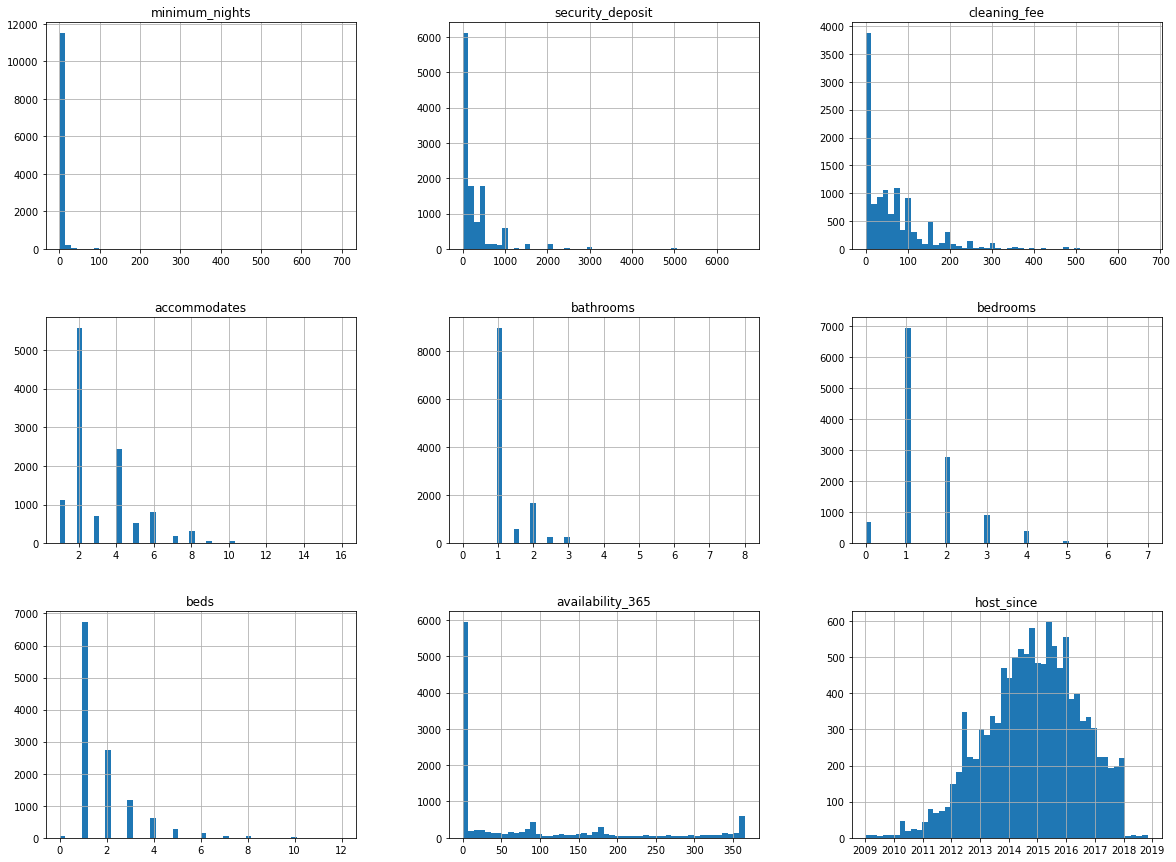

In [67]:
# data expolration
try:  
  df.iloc[:,6:].hist(bins = 50 , figsize = (20 , 15))
  plt.show()
except :
  pass

In [71]:
# We need to convert our categorical columns to numeric, so we use the sklearn's funtion LabelEncoder to do this
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
df["city_code"] = le.fit_transform(df['city'])

##  Similar to above encoding, here we encode binary 1, 0 for t and f. 

df["host_identity_verified"] = df["host_identity_verified"].apply(lambda x: 1 if x=="t" else 0)
df["host_is_superhost"] = df["host_is_superhost"].apply(lambda x: 1 if x=="t" else 0)

In [72]:
df.head()

,price,city,longitude,latitude,review_scores_rating,number_of_reviews,minimum_nights,security_deposit,cleaning_fee,accommodates,...,bedrooms,beds,property_type,room_type,availability_365,host_identity_verified,host_is_superhost,host_since,cancellation_policy,city_code
0,65.0,Potts Point,151.226562,-33.869168,92.0,177,2,0.0,0.0,1,...,1.0,1.0,Apartment,Private room,339,0,1,2009-09-23,moderate,13
1,98.0,Pyrmont,151.191896,-33.865153,95.0,468,2,0.0,55.0,2,...,1.0,1.0,Townhouse,Private room,188,1,0,2009-05-14,strict_14_with_grace_period,14
2,63.0,Redfern,151.200450,-33.890765,89.0,172,2,0.0,0.0,2,...,1.0,1.0,Apartment,Private room,215,1,0,2009-11-30,moderate,16
3,39.0,Redfern,151.200896,-33.889667,90.0,147,2,0.0,0.0,1,...,1.0,1.0,Apartment,Shared room,287,1,0,2009-11-30,moderate,16
4,111.0,Darlinghurst,151.216541,-33.880455,88.0,272,2,0.0,0.0,2,...,1.0,1.0,Apartment,Private room,285,1,0,2009-03-12,strict_14_with_grace_period,5


In [75]:
# Let's narrow our visual map and remove locations outside the main area
traval_co = df[(df["longitude"]>151.16)&(df["latitude"]<-33.75)].reset_index(drop=True)

traval_co = traval_co[traval_co["latitude"]>-33.95].reset_index(drop=True)

# And only look at locations under $600
traval_co = traval_co[traval_co["price"]<600].reset_index(drop=True)

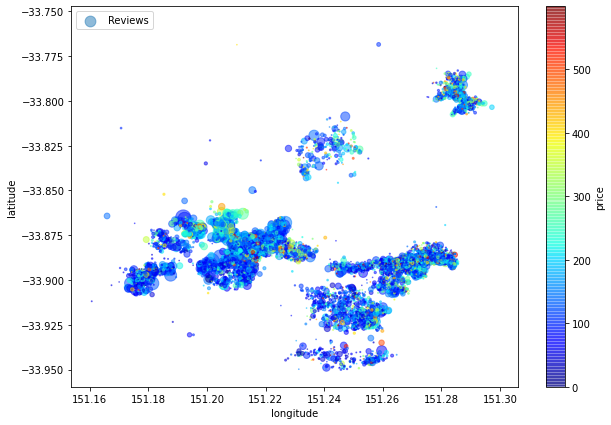

In [78]:
traval_co.plot(kind="scatter", x="longitude", y="latitude", alpha=0.5, s=traval_co["number_of_reviews"]/2, label="Reviews", figsize=(10,7), c="price", cmap=plt.get_cmap("jet"), colorbar=True, sharex=False)
plt.legend()


Text(0.5, 1.0, 'Heatmap of Correlation Matrix')

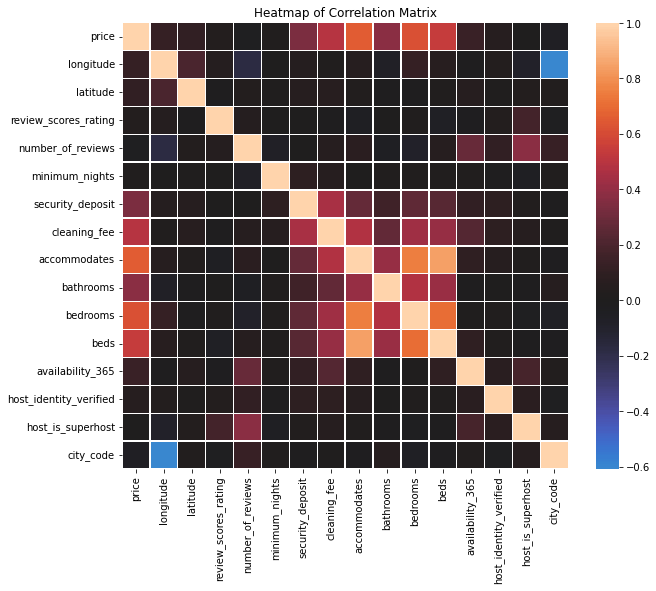

In [80]:
# Now let's explore our correlation matrix

corr_matrix = traval_co.corr()

# Heatmap
plt.figure(figsize = (10,10))
sns.heatmap(corr_matrix, xticklabels=corr_matrix.columns.values,yticklabels=corr_matrix.columns.values,vmax=1, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .82})
plt.title('Heatmap of Correlation Matrix')

In [81]:
corr_matrix["price"].sort_values(ascending=False)

price                     1.000000
accommodates              0.655297
bedrooms                  0.621986
beds                      0.547352
cleaning_fee              0.493298
bathrooms                 0.373973
security_deposit          0.339365
availability_365          0.137103
longitude                 0.115660
latitude                  0.108295
host_identity_verified    0.046249
review_scores_rating      0.038600
minimum_nights            0.024706
host_is_superhost         0.006806
number_of_reviews        -0.033059
city_code                -0.049227
Name: price, dtype: float64

scatter_matrix_plot


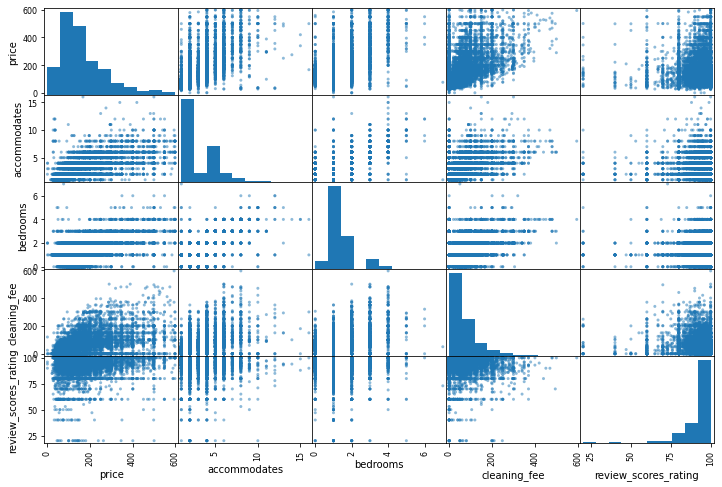

In [88]:
from pandas.plotting import scatter_matrix

attributes = ["price", "accommodates", "bedrooms",
              "cleaning_fee","review_scores_rating"]
scatter_matrix(traval_co[attributes], figsize=(12, 8))
print("scatter_matrix_plot")

In [82]:
#### Now let's create some new features

traval_co["bedrooms_per_person"] = traval_co["bedrooms"]/traval_co["accommodates"]
traval_co["bathrooms_per_person"] = traval_co["bathrooms"]/traval_co["accommodates"]
traval_co['host_since'] = pd.to_datetime(traval_co['host_since'])
traval_co['days_on_airbnb'] = (pd.to_datetime('today') - traval_co['host_since']).dt.days

In [83]:
traval_co.head()

,price,city,longitude,latitude,review_scores_rating,number_of_reviews,minimum_nights,security_deposit,cleaning_fee,accommodates,...,room_type,availability_365,host_identity_verified,host_is_superhost,host_since,cancellation_policy,city_code,bedrooms_per_person,bathrooms_per_person,days_on_airbnb
0,65.0,Potts Point,151.226562,-33.869168,92.0,177,2,0.0,0.0,1,...,Private room,339,0,1,2009-09-23,moderate,13,1.0,NaN,4552.0
1,98.0,Pyrmont,151.191896,-33.865153,95.0,468,2,0.0,55.0,2,...,Private room,188,1,0,2009-05-14,strict_14_with_grace_period,14,0.5,0.5,4684.0
2,63.0,Redfern,151.200450,-33.890765,89.0,172,2,0.0,0.0,2,...,Private room,215,1,0,2009-11-30,moderate,16,0.5,0.5,4484.0
3,39.0,Redfern,151.200896,-33.889667,90.0,147,2,0.0,0.0,1,...,Shared room,287,1,0,2009-11-30,moderate,16,1.0,2.0,4484.0
4,111.0,Darlinghurst,151.216541,-33.880455,88.0,272,2,0.0,0.0,2,...,Private room,285,1,0,2009-03-12,strict_14_with_grace_period,5,0.5,0.5,4747.0


## **NOW data is ready to run ml model!**